In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path='C:\ML\Compute Tasks\Task 2\dataset_task2.csv'

df=pd.read_csv(path)

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [190]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [192]:
unique_values_series=df.apply(lambda x: x.unique())
print(unique_values_series)

CustomerID                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object


Finding null values

In [193]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [194]:
from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder(categories=[['Female','Male']])
df['Gender']=ode.fit_transform(df[['Gender']])
df=df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


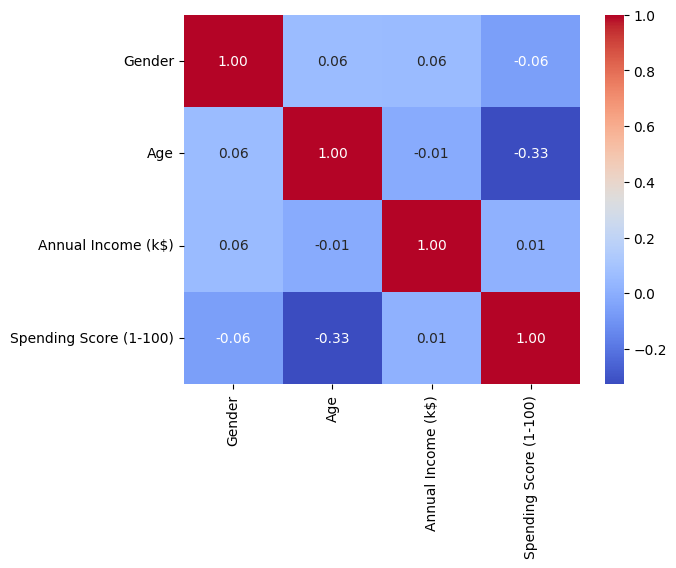

In [195]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',xticklabels=df.columns,yticklabels=df.columns)
plt.show()

We need to do scaling before doing PCA

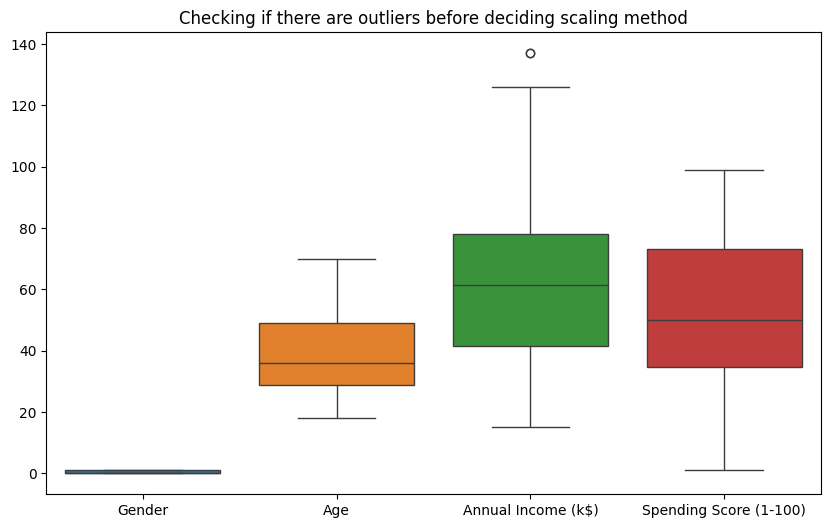

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [196]:

plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.title('Checking if there are outliers before deciding scaling method')
plt.show()
print(df.columns)

Checking skewness of variables

In [197]:
df.skew()

Gender                    0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Since there is a outlier ,we will use robust scaler

In [198]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaled_data=scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df=pd.DataFrame(scaled_data,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
new_df=pd.concat([df['Gender'],scaled_df],axis=1)
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,-0.839506,-1.273973,-0.287582
1,1.0,-0.740741,-1.273973,0.810458
2,0.0,-0.790123,-1.246575,-1.150327
3,0.0,-0.641975,-1.246575,0.705882
4,0.0,-0.246914,-1.219178,-0.261438
...,...,...,...,...
195,0.0,-0.049383,1.602740,0.758170
196,0.0,0.444444,1.767123,-0.575163
197,1.0,-0.197531,1.767123,0.627451
198,1.0,-0.197531,2.068493,-0.836601


Doing PCA on Scaled DataFrame,reducing number of dimensions to 2

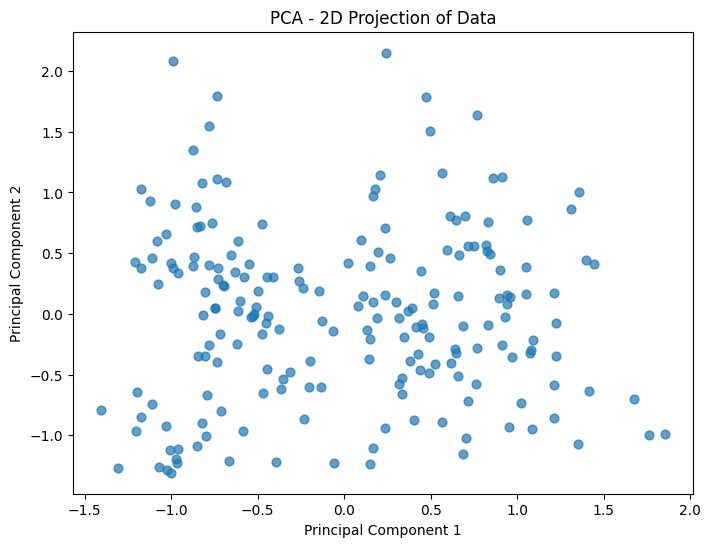

array([0.36599287, 0.30581269])

In [199]:
from sklearn.decomposition import PCA

pca_2d=PCA(n_components=2)
df_after_pca=pca_2d.fit_transform(new_df)

plt.figure(figsize=(8,6))
plt.scatter(df_after_pca[:, 0], df_after_pca[:, 1], s=40, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Data')
plt.show()

pca_2d.explained_variance_ratio_

Since 2 dimensions dont clearly distinguish the clusters, we will use 3 dimensions

Text(0.5, 0.92, 'PCA - 3D Projection of Data')

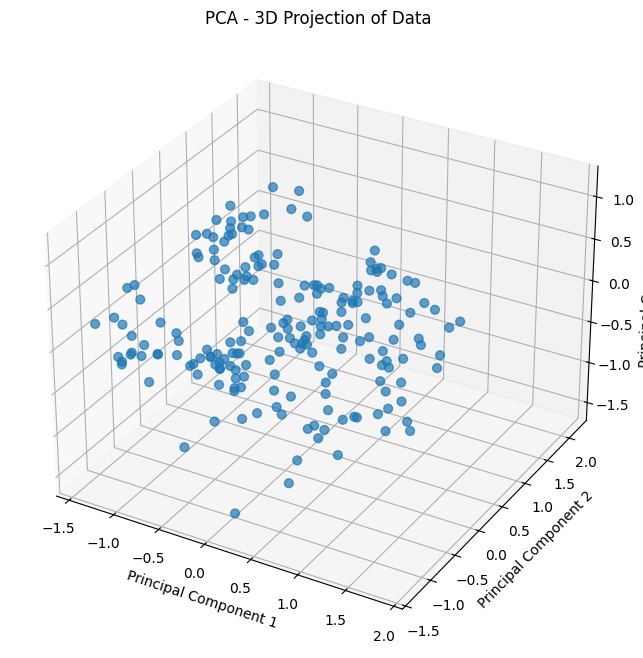

In [200]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca_3d=PCA(n_components=3)
df_after_pca=pca_3d.fit_transform(new_df)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_after_pca[:, 0], df_after_pca[:, 1], df_after_pca[:, 2], s=40, alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Projection of Data')

Doing PCA on Scaled DataFrame,reducing number of dimensions to 3

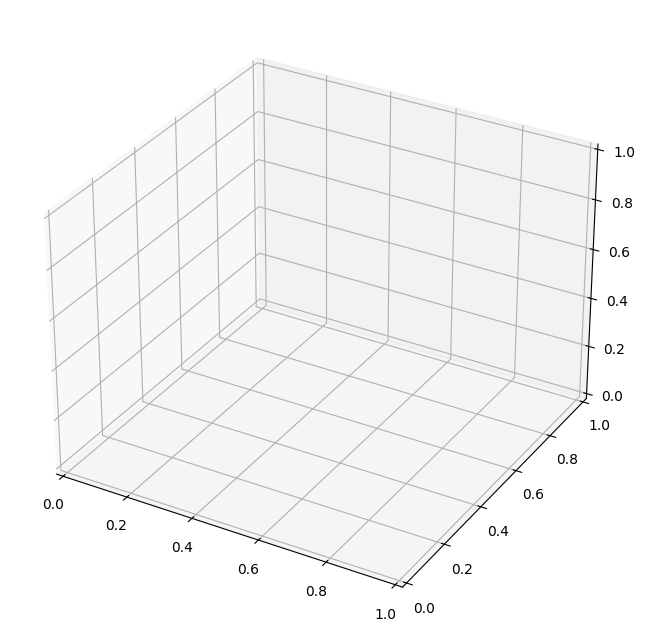

In [201]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca_2d=PCA(n_components=3)
df_after_pca=pca_2d.fit_transform(new_df)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
